# Caffe的Python接口学习(7)：绘制loss和accuracy曲线

使用python接口来运行caffe程序，主要的原因是python非常容易可视化。所以不推荐大家在命令行下面运行python程序。如果非要在命令行下面运行，哈不如直接用C++算了。

推荐使用jupyter notebook，spyder等工具来运行python代码，这样才和它的可视化完美结合起来。

首先介绍spyder，与Matlab界面类似的一款编辑器，在运行过程中，可以查看各变量的值，便于理解，如下图：

![spyder界面显示](./26-attach/spyder.jpg)

直接在终端输入spyder命令就可以了。

在caffe的训练过程中，我们如果想知道某个阶段的loss值和accuracy值，并用图表画出来，用python接口就对了。


plot the train loss and test accuracy



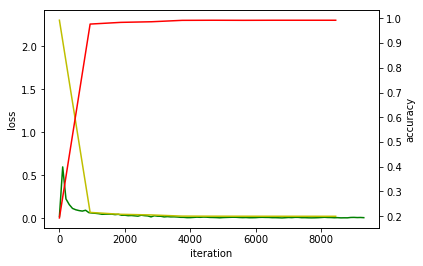

In [7]:
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
%matplotlib inline
import caffe
import numpy as np
from math import ceil

# caffe.set_device(0)
# caffe.set_mode_gpu()

# 使用SGDSolver，即随机梯度下降算法
solver = caffe.SGDSolver('/root/Repository/caffe/examples/mine/mnist/solver.prototxt')

# 等价于solver文件中的max_iter，即最大解算次数
niter = 9380
# 每隔100次收集一次数据
display = 100

# 每次测试进行100次解算，10000/100
test_iter = 100
# 每一个epoch进行一次测试，60000/64
test_interval = 938

# 初始化
train_loss = np.zeros(int(ceil(niter * 1.0 / display)))
test_loss = np.zeros(int(ceil(niter * 1.0 / test_interval)))
test_acc = np.zeros(int(ceil(niter * 1.0 / test_interval)))

# iteration 0, 不计入
solver.step(1)

# 辅助变量
_train_loss = 0; _test_loss = 0; _accuracy = 0
# 进行解算
for it in range(niter):
    # 进行一次解算
    solver.step(1)
    # 每迭代一次，训练batch_size张图片
    _train_loss += solver.net.blobs['SoftmaxWithLoss1'].data
    if it % display == 0:
        # 计算平均train_loss
        train_loss[it // display] = _train_loss / display
        _train_loss = 0
        
    if it % test_interval == 0:
        for test_it in range(test_iter):
            # 进行一次测试
            solver.test_nets[0].forward()
            # 计算test loss
            _test_loss += solver.test_nets[0].blobs['SoftmaxWithLoss1'].data
            # 计算test accuray
            _accuracy += solver.test_nets[0].blobs['Accuracy1'].data
        # 计算平均test loss
        test_loss[it / test_interval] = _test_loss / test_iter
        # 计算平均test accuracy
        test_acc[it / test_interval] = _accuracy / test_iter
        _test_loss = 0
        _accuracy = 0
        
# 绘制train loss、test loss和accuracy曲线
print('\nplot the train loss and test accuracy\n')
_, ax1 = plt.subplots()
ax2 = ax1.twinx()

# train loss -> 绿色
ax1.plot(display * np.arange(len(train_loss)), train_loss, 'g')
# test loss -> 黄色
ax1.plot(test_interval * np.arange(len(test_loss)), test_loss, 'y')
# test accuracy -> 红色
ax2.plot(test_interval * np.arange(len(test_acc)), test_acc, 'r')

ax1.set_xlabel('iteration')
ax1.set_ylabel('loss')
ax2.set_ylabel('accuracy')
plt.show()